In [ ]:
"""
This notebook generates plots in Fig. 1 of the paper.
For example track plots, please see the example tracks directory.
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [13]:
# LOAD DATA

SCRATCH = "/Users/adamhe/github/scratch"

# Negative and positive bounds for model performance on correlation
mean_predictor_corr = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_metric/pos_neg_bounds/mean_predictor_corrs.csv.gz"),
    index_col=0,
)
replicate_corr = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_metric/pos_neg_bounds/replicate_pearsons.csv.gz"),
    index_col=0,
)

# Load model predictions
full_pearson = pd.read_csv(
    os.path.join(
        SCRATCH,
        "evaluation_metric/ensemble_test/ensemble_fold_0_pearson.csv.gz",
    ),
    index_col=0,
)

# Subsample
subsample_pearson = pd.read_csv(
    os.path.join("subsample_run_0_track_corr.csv.gz"), index_col=0
).T

In [22]:
replicate_corr

,0,1,2,3,4,5,6,7,8
0,0.770559,0.875159,0.807911,0.780556,0.818940,0.781970,0.897139,0.882213,0.906760
1,0.877292,0.944995,0.958225,0.861338,0.937095,0.950436,0.926536,0.942541,0.931704
2,0.877148,0.944899,0.958181,0.861338,0.937095,0.950436,0.926431,0.942541,0.931704
3,0.869993,0.942347,0.955497,0.854259,0.928876,0.945583,0.922951,0.936846,0.928090
4,0.869745,0.942289,0.955307,0.853707,0.928544,0.945303,0.922847,0.936426,0.927919
...,...,...,...,...,...,...,...,...,...
4896,0.738355,0.637327,0.849446,0.581816,0.761561,0.749835,0.951948,0.613619,0.813668
4897,0.707023,0.751486,0.902955,0.774781,0.777253,0.770167,0.944901,0.673965,0.849011
4898,0.698437,0.770888,0.880198,0.760684,0.754926,0.760835,0.931274,0.672573,0.842491
4899,0.759322,0.882419,0.853449,0.748170,0.798197,0.869759,0.882559,0.817706,0.911214


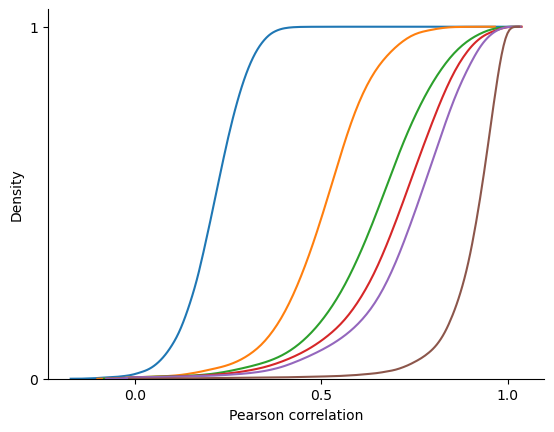

In [29]:
# Plot cdfs of pearson correlations (not used in paper, but here for completion's sake)

fig, d = plt.subplots()
sns.kdeplot(list(mean_predictor_corr.mean(axis=0)) + [1], cumulative=True)
sns.kdeplot(subsample_pearson[0], cumulative=True)
sns.kdeplot(subsample_pearson[1], cumulative=True)
sns.kdeplot(subsample_pearson[2], cumulative=True)
#sns.kdeplot(subsample_pearson[3], cumulative=True)
sns.kdeplot(full_pearson.values.reshape(-1), cumulative=True)
sns.kdeplot(replicate_corr.values.reshape(-1), cumulative=True)

#plt.axvline(np.nanmedian(mean_predictor_corr), 0, 1, color=colors[0], linestyle="--")
#plt.axvline(np.nanmedian(subsample_pearson[0]), 0, 1, color=colors[1], linestyle="--")
#plt.axvline(np.nanmedian(subsample_pearson[1]), 0, 1, color=colors[2], linestyle="--")
#plt.axvline(np.nanmedian(subsample_pearson[2]), 0, 1, color=colors[3], linestyle="--")
#plt.axvline(np.nanmedian(full_pearson), 0, 1, color=colors[4], linestyle="--")
#plt.axvline(np.nanmedian(replicate_corr), 0, 1, color=colors[5], linestyle="--")

d.set_yticks([0, 1])
#d.set_yticklabels(["", ""])
d.set_xticks([0, 0.5, 1])
#d.set_xticklabels(["", "", ""])
d.set_ylabel("Density")
d.set_xlabel("Pearson correlation")
sns.despine()
plt.savefig("subsample_predictions_pearson_cdf.pdf")